The model is aim to predict the new data using decision tree algorithm which is a non-parametric supervised learning method utilized for classification and regression tasks.
The dataset is "IRIS" dataset. 


**In order to build model, we need to import a few python libraries:**



In [81]:
import pandas as pd
import numpy as np

Reading the dataset with the help of the Pandas.



In [82]:
Dataset = pd.read_csv("/content/Iris.csv")
Dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dropping the unnecessary column.

In [83]:
Dataset = Dataset.drop('Id', axis=1)
Dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Exploring the Dataset(information(info), shape, columns)

In [84]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [85]:
Dataset.shape

(150, 5)

In [86]:
Dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Data Preprocessing: from Categorical to Numerical

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
label = LabelEncoder()
Dataset.iloc[:,-1] = label.fit_transform(Dataset.iloc[:,-1])
Dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


To construct the model, we are splitting the dataset into two parts: test and train.
We can choose the proportion of the train and test data, here i am taking it with the proportion of 70:30
For the Decision Tree, we import this tree form Scikit-learn library.

In [88]:
# Splitting the dataset:
x = Dataset.iloc[:,:-1] #independent variable
y = Dataset.iloc[:,-1] #dependent variable


In [89]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [90]:
# Importing the libraries for tree visualization and 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

Comparision between Actual and Predicted Output

In [91]:
y_pred_DT = DT.predict(x_test)
y_pred_DT

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [92]:
y_test_DT = np.array(y_test)
y_test_DT

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [93]:
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score,roc_curve

DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)
DT_predicted = DT.predict(x_test)
DT_acc_score = accuracy_score(y_test, y_pred_DT)

print("\n")
print("Accuracy of Decision Tree :",DT_acc_score*100,'\n')
print(classification_report(y_test,DT_predicted))
print(confusion_matrix(y_pred_DT,y_test))



Accuracy of Decision Tree : 97.77777777777777 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


Decision Tree Visualization

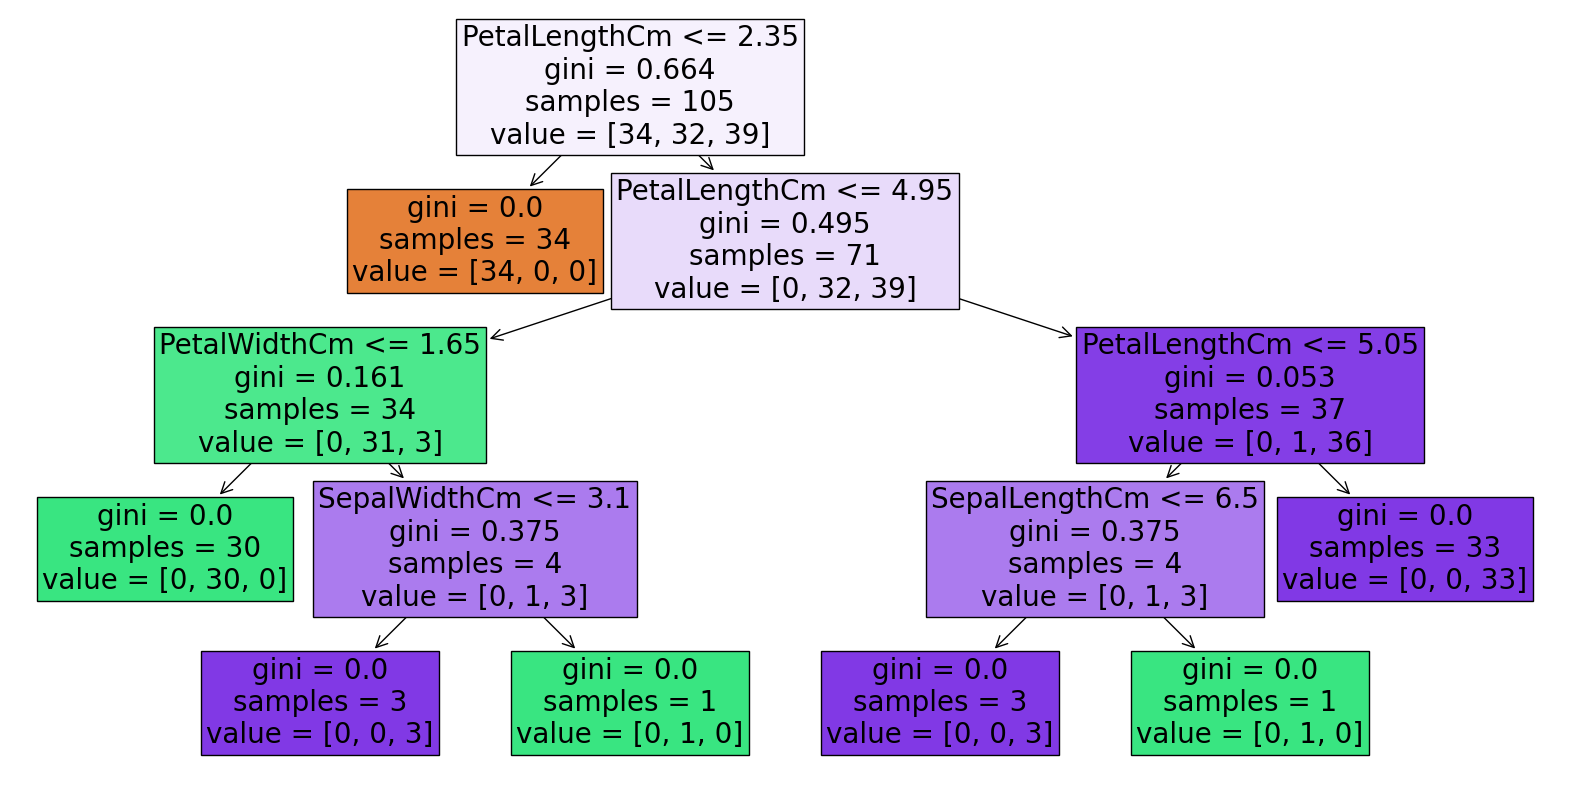

In [97]:
from sklearn import tree
plt.figure(figsize=(20,10))
dtviz = tree.plot_tree(DT, feature_names= x.columns, filled=True, fontsize= 20)

In [95]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: 2



Now we can test the new data in order to check the accuracy of the model.